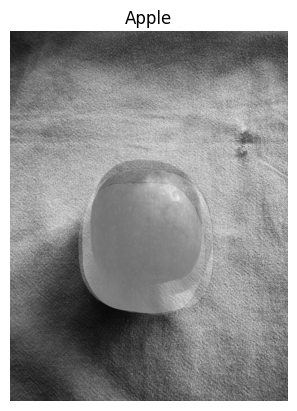

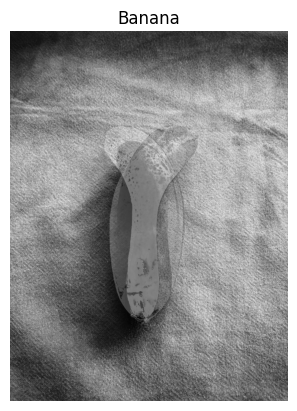

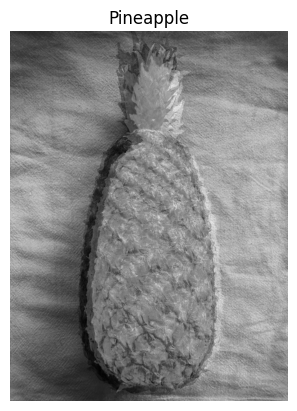

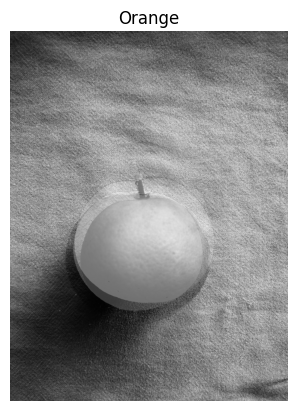

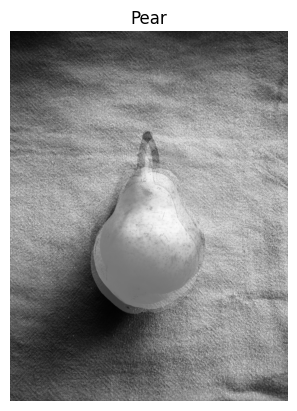

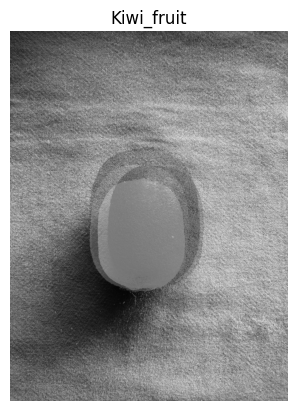

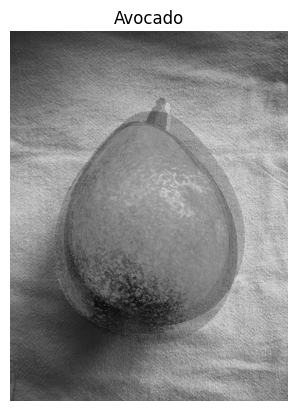

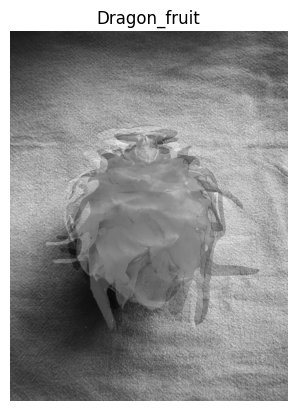

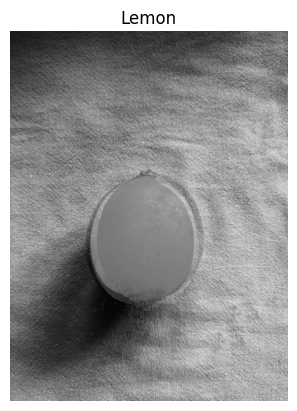

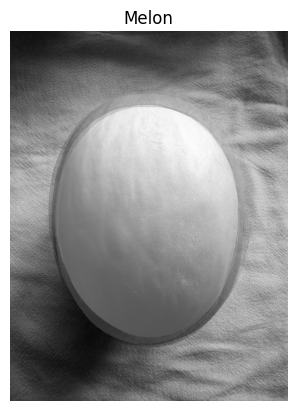

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import math

def read_image(filename):
    return cv2.imread(filename)

def equalize_image(filename, output_path):
    # Carrega a imagem em cores
    image = read_image(filename)

    # Converte a imagem para escala de cinza
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Equaliza o histograma
    equ = cv2.equalizeHist(gray)

    # Cálculo da variância
    imean = np.mean(gray)
    grayf = gray.astype(np.float32)
    grayf2 = grayf * grayf
    imeanf2 = np.mean(grayf2)
    ivar = imeanf2 - imean**2
    istd = math.sqrt(ivar)

    # Salva a imagem equalizada
    output_filename = os.path.join(output_path, os.path.basename(filename))
    cv2.imwrite(output_filename, equ)

def compute_average_image(image_folder):
    image_files = os.listdir(image_folder)
    if len(image_files) == 0:
        return None

    # Calcula a imagem média
    average_image = None
    for filename in image_files:
        image_path = os.path.join(image_folder, filename)
        image = read_image(image_path)
        if average_image is None:
            average_image = np.zeros_like(image, dtype=np.float64)
        average_image += image / len(image_files)
    average_image = average_image.astype(np.uint8)

    return average_image

def plot_average_images(fruits):
    for fruit in fruits:
        output_folder = os.path.join('EqualizedImages', fruit[0].capitalize())
        average_image_path = os.path.join(output_folder, 'average.png')
        if os.path.exists(average_image_path):
            average_image = read_image(average_image_path)
            plt.imshow(cv2.cvtColor(average_image, cv2.COLOR_BGR2RGB))
            plt.title(fruit[0].capitalize())
            plt.axis('off')
            plt.show()

fruits = [('apple', '01'), ('banana', '02'), ('pineapple', '03'), ('orange', '04'), ('pear', '05'), ('kiwi_fruit', '06'), ('avocado', '07'), ('dragon_fruit', '08'), ('lemon', '09'), ('melon', '10')]
versions = ['V1', 'V2']
colors = ['B', 'W']
operations = ['', 'cnv', 'pot', 'mirror']
folder_original_images = 'FrutasORG'

def get_image_paths(folder_path, fruit):
    image_paths = []
    for version in versions:
        for color in colors:
            filename = '0-' + fruit[1] + '-' + version + '-' + color + '.png'
            image_path = os.path.join(folder_path, filename)
            image_paths.append(image_path)
    return image_paths

def process_images_in_folder(folder_path, fruit):
    image_paths = get_image_paths(folder_path, fruit)
    output_folder = os.path.join('EqualizedImages', fruit[0].capitalize())
    os.makedirs(output_folder, exist_ok=True)
    for image_path in image_paths:
        equalize_image(image_path, output_folder)

    # Computa a imagem média
    average_image = compute_average_image(output_folder)
    if average_image is not None:
        average_filename = os.path.join(output_folder, 'average.png')
        cv2.imwrite(average_filename, average_image)

# Caminho para as imagens originais
for fruit in fruits:
    fruit_folder = os.path.join(folder_original_images, fruit[0].capitalize())
    process_images_in_folder(fruit_folder, fruit)

# Plota as imagens médias das classes
plot_average_images(fruits)
